### Introduction : 

Employees are the most valuable assets of an organization. They add value to the organization in terms
of quantity and quality as well. Therefore, it is indispensable to maintain a permanent and promising workforce.
Over the years it has become a tough task for employers and thereby increased attrition in the organizations.
Attrition of employees in a limited measure is desirable for influx of new ideas in any type of organization. It
helps organizations to maintain their agility in a fast changing environment.

### Problem Statement :

This project is based on a hypothetical dataset downloaded from IBM HR Analytics Employee Attrition & Performance. It has 1,470 data points (rows) and 35 features (columns) describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. Machine Learning models can help to understand and determine how these factors relate to workforce attrition.

##### Importing the required librabries

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

##### Load dataset

In [3]:
hrdata = pd.read_csv('HR-Analytics.csv')

### Exploratory Data Analysis

In [4]:
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hrdata.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
hrdata.shape

(1470, 35)

#### Checking for null values.

In [7]:
hrdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
hrdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
for column in hrdata.columns:
    print(f"{column} : Unique values are {hrdata[column].nunique()}\n")

Age : Unique values are 43

Attrition : Unique values are 2

BusinessTravel : Unique values are 3

DailyRate : Unique values are 886

Department : Unique values are 3

DistanceFromHome : Unique values are 29

Education : Unique values are 5

EducationField : Unique values are 6

EmployeeCount : Unique values are 1

EmployeeNumber : Unique values are 1470

EnvironmentSatisfaction : Unique values are 4

Gender : Unique values are 2

HourlyRate : Unique values are 71

JobInvolvement : Unique values are 4

JobLevel : Unique values are 5

JobRole : Unique values are 9

JobSatisfaction : Unique values are 4

MaritalStatus : Unique values are 3

MonthlyIncome : Unique values are 1349

MonthlyRate : Unique values are 1427

NumCompaniesWorked : Unique values are 10

Over18 : Unique values are 1

OverTime : Unique values are 2

PercentSalaryHike : Unique values are 15

PerformanceRating : Unique values are 2

RelationshipSatisfaction : Unique values are 4

StandardHours : Unique values are 1

St

### Observation : 

 From the above output we can observe that for columns Over18, EmployeeCount and StandardHours have only one unique value.
 Column EmployeeNumber have 1470 unique values so these columns we can dropn from our dataset as they are not needed.

In [11]:
hrdata.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [12]:
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
hrdata.shape

(1470, 31)

##### Identifying numerical and catagorical columns

In [14]:
hrdata.loc[:,hrdata.dtypes==np.object]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [15]:
hrdata.loc[:,hrdata.dtypes!=np.object]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


### Univariate Analysis :

In [16]:
hrdata['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0, 0.5, 'Attrition rate')

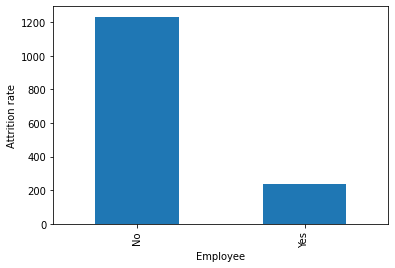

In [17]:
hrdata.Attrition.value_counts().plot.bar()
plt.xlabel('Employee')
plt.ylabel('Attrition rate')

Text(0.5, 0, 'Gender')

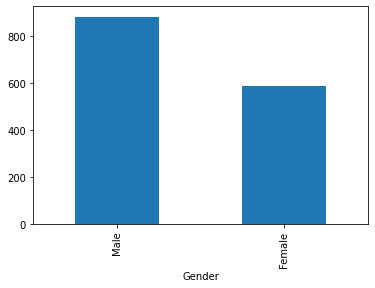

In [18]:
hrdata['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')

Text(0.5, 0, 'Department')

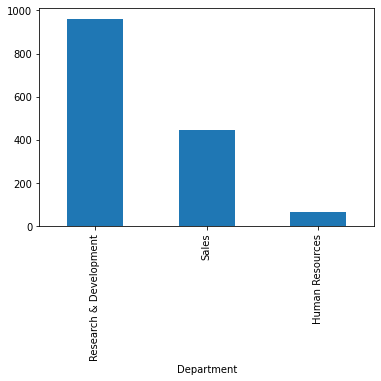

In [19]:
hrdata['Department'].value_counts().plot.bar()
plt.xlabel('Department')

## Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

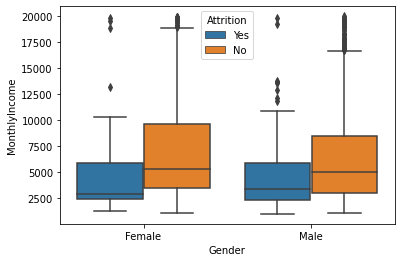

In [20]:
sns.boxplot(x=hrdata.Gender, y=hrdata.MonthlyIncome, hue=hrdata.Attrition)

                         MonthlyIncome
Education     Attrition               
Bachelor      No           6882.919662
              Yes          4770.242424
Below College No           5926.129496
              Yes          4360.161290
College       No           6586.058824
              Yes          4282.545455
Doctor        No           8559.906977
              Yes          5850.200000
Master        No           7087.814706
              Yes          5335.155172


<AxesSubplot:xlabel='Education'>

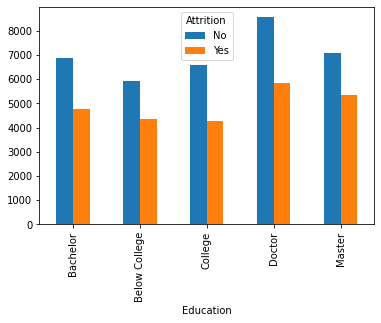

In [21]:
edu_attrition = hrdata[["Education", "Attrition", "MonthlyIncome"]]
edu_attrition = edu_attrition.replace({"Education": {1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}})
edu_attrition = edu_attrition.groupby(["Education", "Attrition"]).agg('mean')
print(edu_attrition)
edu_attrition.unstack(level=-1)['MonthlyIncome'].plot(kind='bar')

<AxesSubplot:xlabel='YearsAtCompany'>

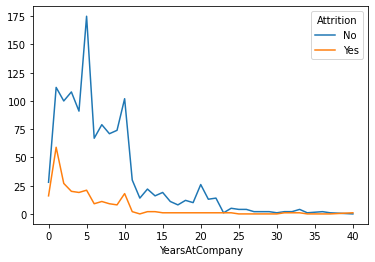

In [22]:
year_attrition = hrdata[["YearsAtCompany", "Attrition"]].groupby(["YearsAtCompany","Attrition"]).size().unstack(level=-1).fillna(0)
year_attrition.plot.line()

<AxesSubplot:xlabel='Attrition'>

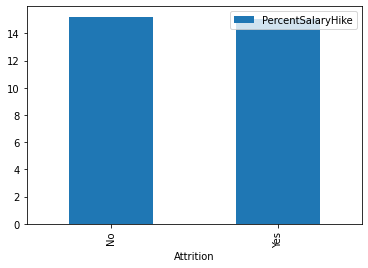

In [23]:
hrdata[["PercentSalaryHike", "Attrition"]].groupby(["Attrition"]).agg('mean').plot.bar()

### Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
hrdata["Attrition"] = label.fit_transform(hrdata.Attrition)

In [25]:
hrdata

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


##### Numerical Features :

In [26]:
disc_col = []
for column in hrdata.columns:
    if hrdata[column].dtypes != object and hrdata[column].nunique() < 30:
        print(f"{column} : {hrdata[column].unique()}","\n")
        disc_col.append(column)
        #print()
disc_col.remove('Attrition')

Attrition : [1 0] 

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13] 

Education : [2 1 4 3 5] 

EnvironmentSatisfaction : [2 3 4 1] 

JobInvolvement : [3 2 4 1] 

JobLevel : [2 1 3 4 5] 

JobSatisfaction : [4 2 3 1] 

NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3] 

PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25] 

PerformanceRating : [3 4] 

RelationshipSatisfaction : [1 4 2 3] 

StockOptionLevel : [0 1 3 2] 

TrainingTimesLastYear : [0 3 2 5 1 4 6] 

WorkLifeBalance : [1 3 2 4] 

YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17] 

YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14] 

YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14] 



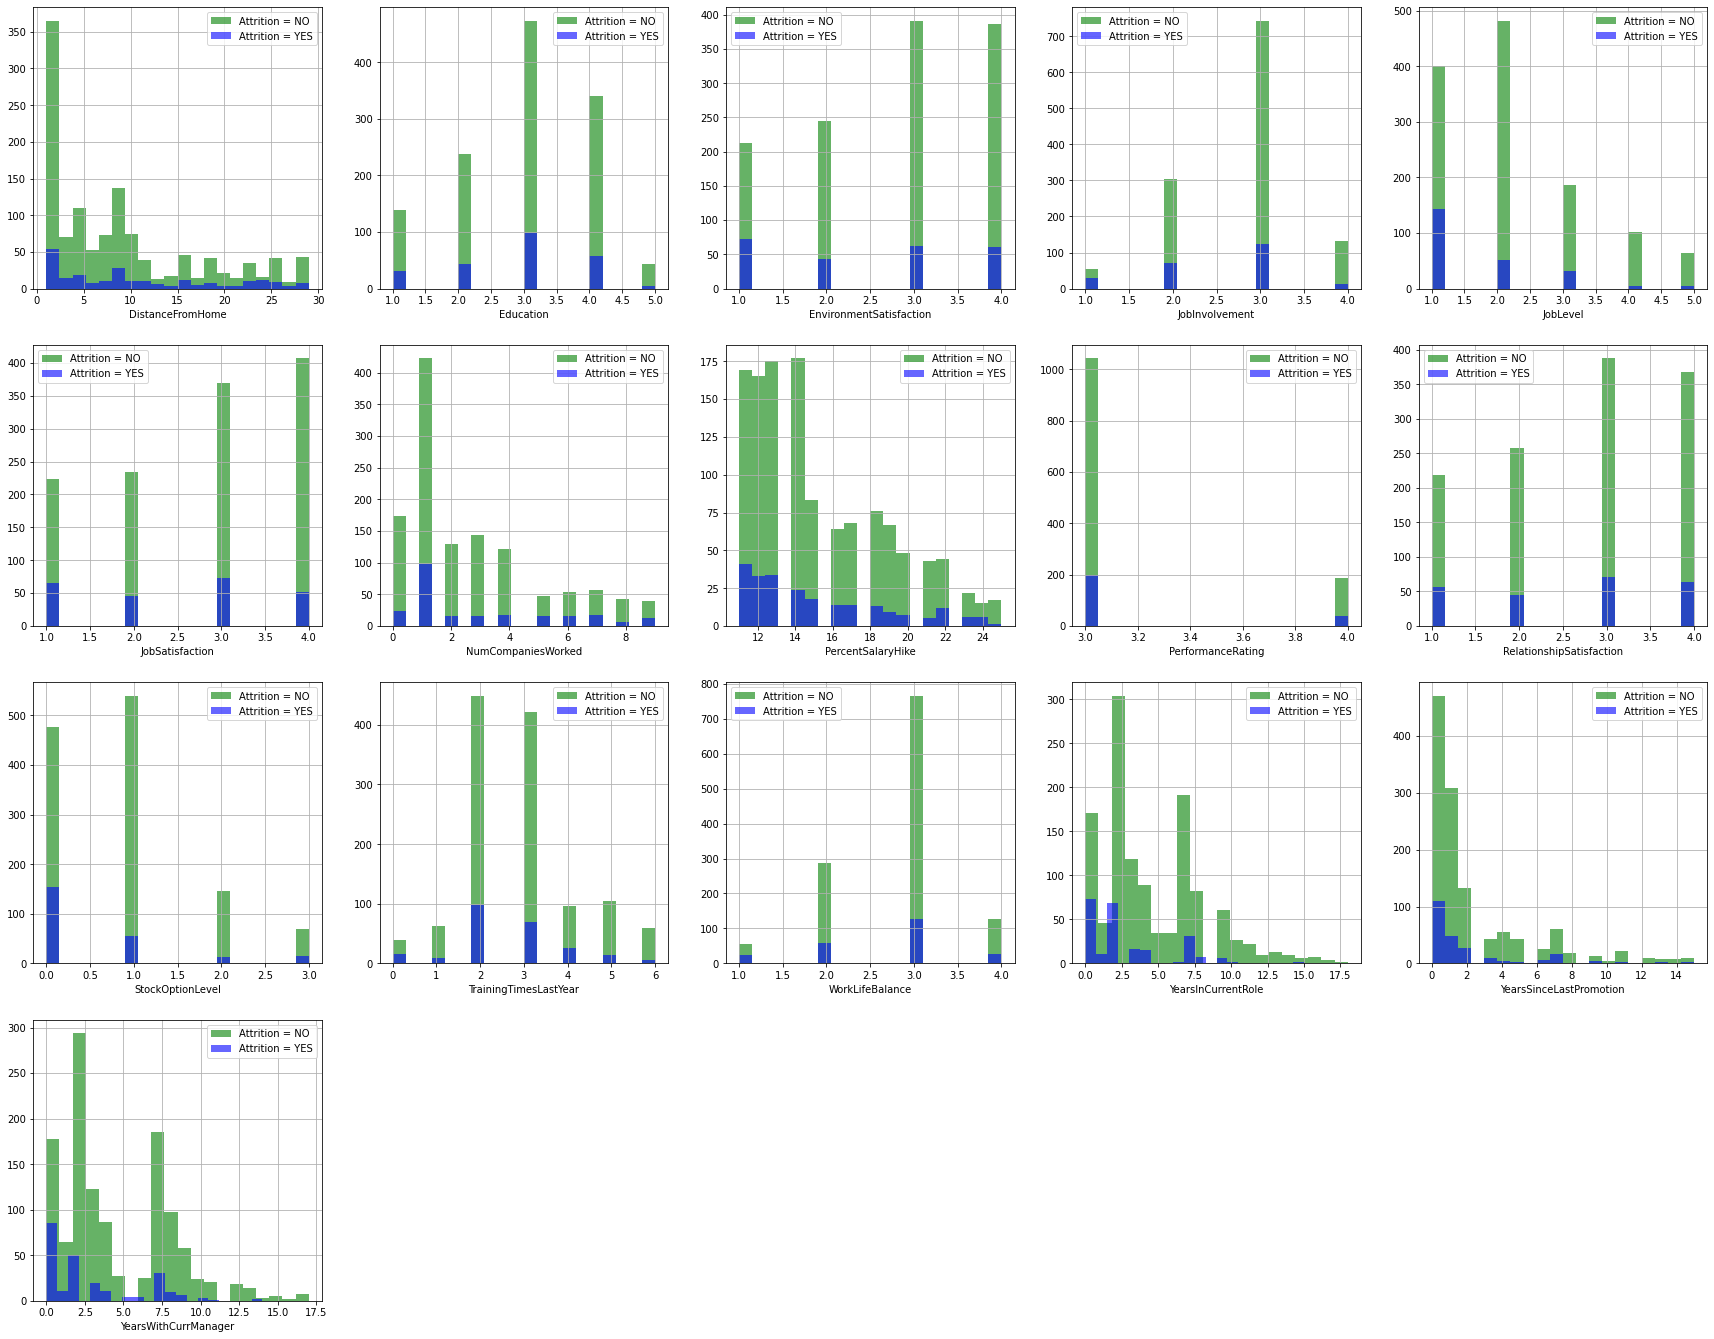

In [27]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(disc_col, 1):
    plt.subplot(5, 5, i)
    hrdata[hrdata["Attrition"] == 0][column].hist(bins=20, color='green', label='Attrition = NO', alpha=0.6)
    hrdata[hrdata["Attrition"] == 1][column].hist(bins=20, color='blue', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Catagorical Features :

In [28]:
cat_col = []
for column in hrdata.columns:
    if hrdata[column].dtypes != object and hrdata[column].nunique() > 30:
        print(f"{column} : Minimum: {hrdata[column].min()}, Maximum: {hrdata[column].max()}","\n")
        cat_col.append(column)

Age : Minimum: 18, Maximum: 60 

DailyRate : Minimum: 102, Maximum: 1499 

HourlyRate : Minimum: 30, Maximum: 100 

MonthlyIncome : Minimum: 1009, Maximum: 19999 

MonthlyRate : Minimum: 2094, Maximum: 26999 

TotalWorkingYears : Minimum: 0, Maximum: 40 

YearsAtCompany : Minimum: 0, Maximum: 40 



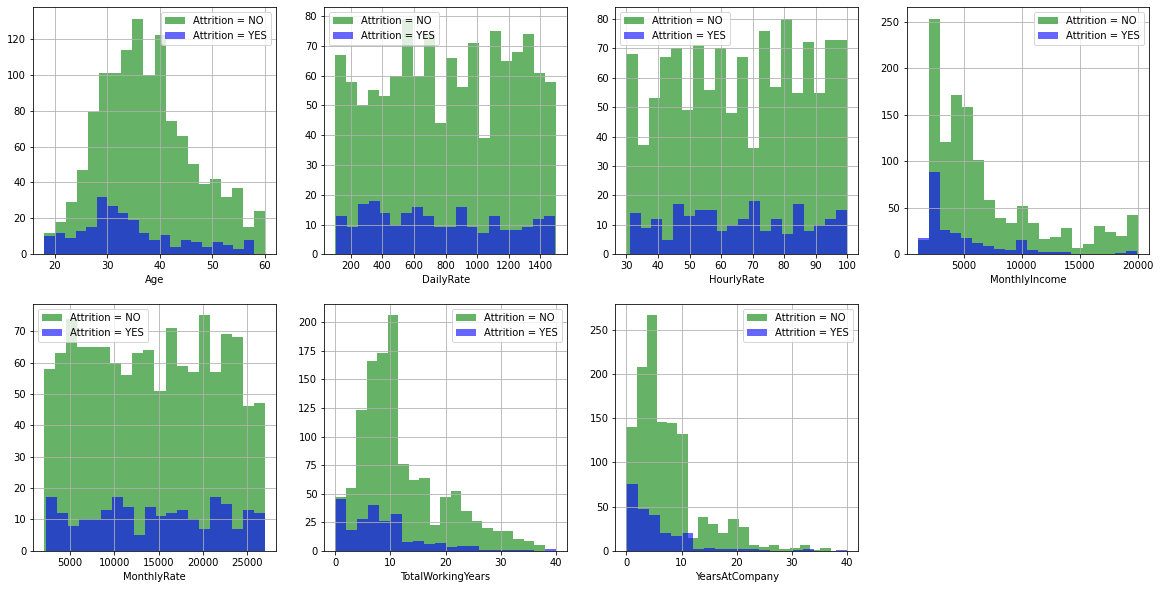

In [29]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 4, i)
    hrdata[hrdata["Attrition"] == 0][column].hist(bins=20, color='green', label='Attrition = NO', alpha=0.6)
    hrdata[hrdata["Attrition"] == 1][column].hist(bins=20, color='blue', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


#### Correlation Map

Text(0.5, 1.0, 'Correlation Heatmap')

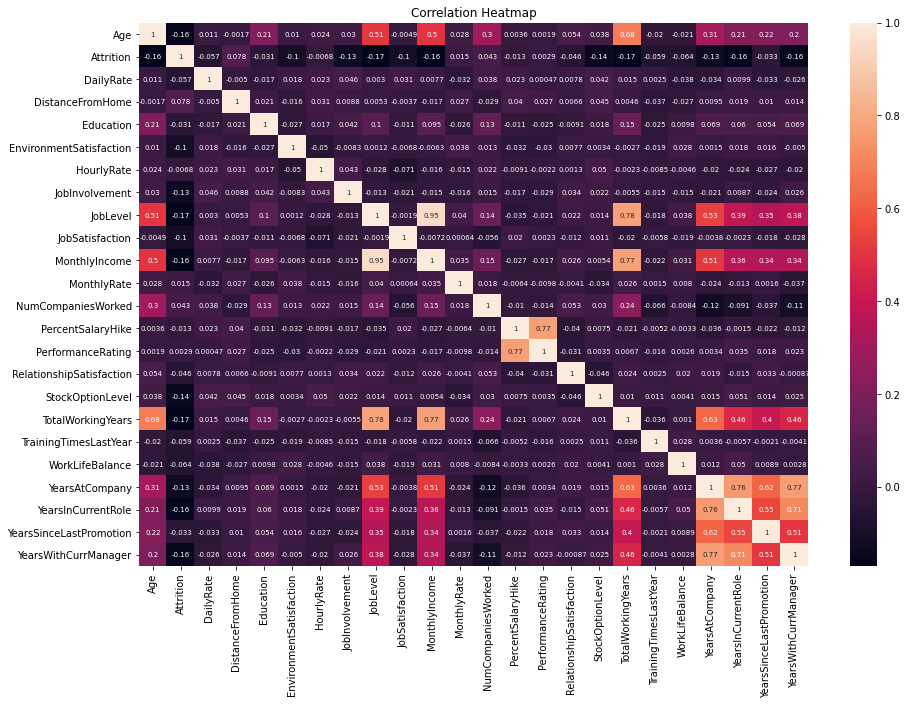

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(hrdata.corr(), annot=True, annot_kws={"size":7})
plt.title("Correlation Heatmap")

#### Observations from Correlation heatmap :

1.Monthly income is highly correlated with Job level.
2.Marital status and stock option level are negatively correlated
3.Monthly income is highly correlated with total working hours.
4.Age is also positively correlated with the Total working hours.
5.Job level is highly correlated with total working hours.

### Data Prossesing :

Converting catagorical data into dummies

In [31]:
dummy_col = [column for column in hrdata.drop('Attrition', axis=1).columns if hrdata[column].nunique() < 20]
data = pd.get_dummies(hrdata, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [32]:
data.shape

(1470, 136)

In [33]:
data = data.T.drop_duplicates() #Remove duplicate feature
data = data.T #Remove duplicate rows
data.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
HourlyRate,94,61,92,56,40,79,81,67,44,94,...,73,39,60,74,30,41,42,87,63,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YearsWithCurrManager_13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YearsWithCurrManager_14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YearsWithCurrManager_15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YearsWithCurrManager_16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.drop_duplicates()
data.shape


(1470, 136)

In [35]:
data

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1,1102,1,94,5993,19479,8,6,0,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1373,2,92,2090,2396,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1392,3,56,2909,23159,8,8,1,...,0,0,0,0,0,0,0,0,0,0
4,27,0,591,2,40,3468,16632,6,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,17,5,1,...,0,0,0,0,0,0,0,0,0,0
1466,39,0,613,6,42,9991,21457,9,7,0,...,0,0,0,0,0,0,0,0,0,0
1467,27,0,155,4,87,6142,5174,6,6,0,...,0,0,0,0,0,0,0,0,0,0
1468,49,0,1023,2,63,5390,13243,17,9,1,...,1,0,0,0,0,0,0,0,0,0


## Applying Machine Learning Algorithm

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
Xdata = data.drop('Attrition', axis=1)
ydata = data.Attrition

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=50, stratify=ydata)

In [39]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [40]:
y_test.value_counts()

0    247
1     47
Name: Attrition, dtype: int64

In [41]:
y_train.shape

(1176,)

In [42]:
X_test.shape

(294, 135)

In [43]:
X_train.shape

(1176, 135)

## 1. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
#Train
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict_lr = lr.predict(X_train)
acc_lr = accuracy_score(y_train, y_predict_lr)*100
print(f"Accuracy Score : {accuracy_score(y_train, y_predict_lr) * 100:.2f} %","\n")
print(confusion_matrix(y_train, y_predict_lr))

Accuracy Score : 83.84 % 

[[985   1]
 [189   1]]


In [45]:
from sklearn.linear_model import LogisticRegression

#TEST
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict_lr = lr.predict(X_test)
acc_lr_test = accuracy_score(y_test, y_predict_lr)*100
print(f"Accuracy Score : {accuracy_score(y_test, y_predict_lr) * 100:.2f} %","\n")
print(confusion_matrix(y_test, y_predict_lr))

Accuracy Score : 84.01 % 

[[247   0]
 [ 47   0]]


## 2. Random Forest Classification

In [46]:
from sklearn.ensemble import RandomForestClassifier
#TRain

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_train)
acc_rfc = accuracy_score(y_train, y_predict_rfc)*100
print(f"Accuracy Score : {accuracy_score(y_train, y_predict_rfc) * 100:.2f} %","\n")
print(confusion_matrix(y_train, y_predict_rfc))

Accuracy Score : 100.00 % 

[[986   0]
 [  0 190]]


In [47]:
#Test

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_test)
acc_rfc_test = accuracy_score(y_test, y_predict_rfc)*100
print(f"Accuracy Score : {accuracy_score(y_test, y_predict_lr) * 100:.2f} %","\n")
print(confusion_matrix(y_test, y_predict_rfc))

Accuracy Score : 84.01 % 

[[246   1]
 [ 42   5]]


Text(0.5, 1.0, 'Feature Importance according to Random Forest Classification')

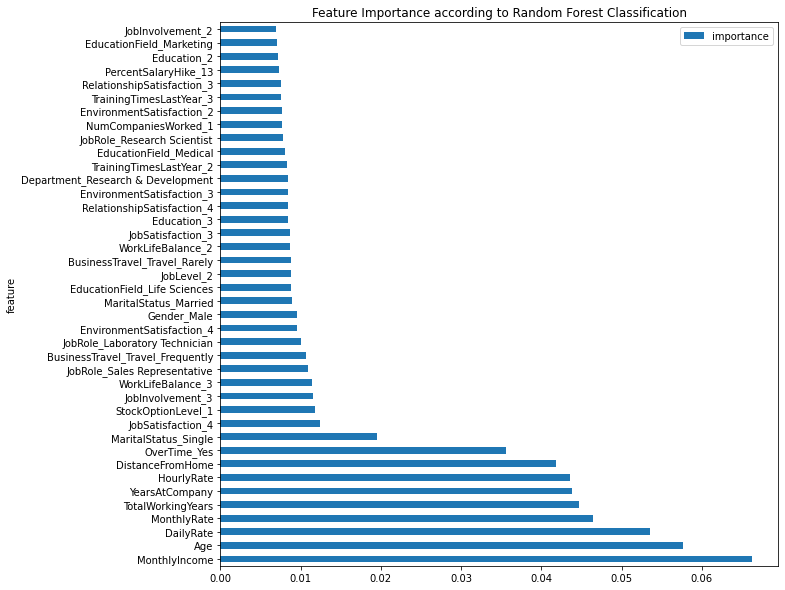

In [48]:
df = feature_imp(Xdata, rfc)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest Classification')

## 3. Support Vector Classification 

In [49]:
from sklearn.svm import SVC
#Train
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_predict_svc = svc.predict(X_train)
acc_svc = accuracy_score(y_train, y_predict_svc)*100
print(f"Accuracy Score : {accuracy_score(y_train, y_predict_svc) * 100:.2f} %","\n")
print(confusion_matrix(y_train, y_predict_svc))

Accuracy Score : 84.18 % 

[[965  21]
 [165  25]]


In [50]:
#Test
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_predict_svc = svc.predict(X_test)
acc_svc_test = accuracy_score(y_test, y_predict_svc)*100
print(f"Accuracy Score : {accuracy_score(y_test, y_predict_svc) * 100:.2f} %","\n")
print(confusion_matrix(y_test, y_predict_svc))

Accuracy Score : 84.69 % 

[[245   2]
 [ 43   4]]


## 4. Decision Tree Classification

In [51]:
from sklearn.tree import DecisionTreeClassifier
#Train
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_predict_dtc = dtc.predict(X_train)
acc_dtc = accuracy_score(y_train, y_predict_dtc)*100
print(f"Accuracy Score : {accuracy_score(y_train, y_predict_dtc) * 100:.2f} %","\n")
print(confusion_matrix(y_train, y_predict_dtc))

Accuracy Score : 100.00 % 

[[986   0]
 [  0 190]]


In [52]:
#Test
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_predict_dtc = dtc.predict(X_test)
acc_dtc_test = accuracy_score(y_test, y_predict_dtc)*100
print(f"Accuracy Score : {accuracy_score(y_test, y_predict_dtc) * 100:.2f} %","\n")
print(confusion_matrix(y_test, y_predict_dtc))

Accuracy Score : 82.65 % 

[[227  20]
 [ 31  16]]


Text(0.5, 1.0, 'Feature Importance according to Decision Tree Classification')

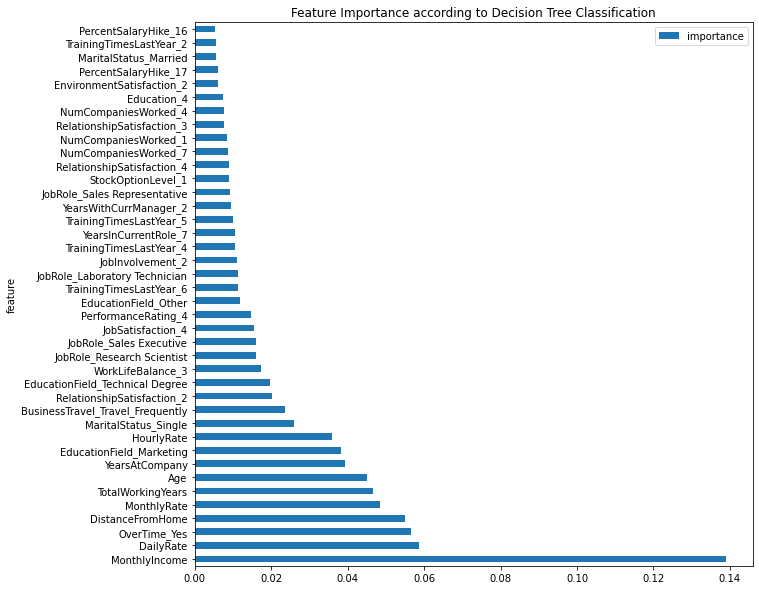

In [53]:
df = feature_imp(Xdata, dtc)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Decision Tree Classification')

### Score comparison of above models

In [54]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Decision Tree', 'Random Forest'],
    
    'Score': [acc_lr_test, acc_svc_test, acc_dtc_test, acc_rfc_test]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.374150
1,Support Vector Machines,84.693878
0,Logistic Regression,84.013605
2,Decision Tree,82.653061


## Hyperparameter Tunning

In [55]:

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier() 

gcv = GridSearchCV(rfc, param_grid=param_grid).fit(Xdata,ydata)

In [56]:
gcv.best_params_ # selecting the best parameters.

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [59]:
rfc = RandomForestClassifier(
                    criterion = 'entropy', 
                    max_depth =  8,
                    max_features = "sqrt",
                    n_estimators = 200) 

rfc.fit(X_train,y_train)
predict = rfc.predict(X_test)
print("Score Of model is : ",accuracy_score(y_test, predict)*100,'%\n')
print(confusion_matrix(y_test, predict))

Score Of model is :  84.6938775510204 %

[[247   0]
 [ 45   2]]


Among all the models random forest classifier gives more accuracy so we will save this model in pkl file.

In [60]:
import joblib
joblib.dump(rfc,"HR_Analytics_rfc.pkl")

['HR_Analytics_rfc.pkl']